<a href="https://colab.research.google.com/github/Himanshu-1703/colab_notebooks/blob/main/SVM_Decision_Boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

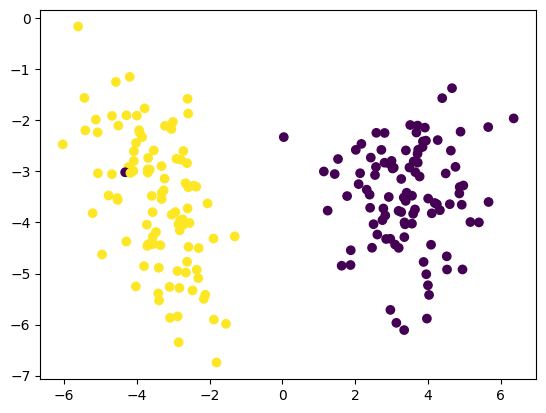

In [2]:
# generate the data

X,y = make_classification(n_samples=200,
                          n_informative=2,
                          n_features=2,
                          n_redundant=0,
                          n_clusters_per_class=1,
                          class_sep=3.5,random_state=98)

# plot the data on a scatter plot

plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [3]:
# the shape of X and y

print('The shape of X is',X.shape)
print('The shape of y is',y.shape)

The shape of X is (200, 2)
The shape of y is (200,)


In [4]:
# make the object of SVC

svc = SVC(kernel='linear',C=1)

# fit on data
svc.fit(X,y)

SVC(C=1, kernel='linear')

In [5]:
# get the distances predicted on data points

y_pred_dist = svc.decision_function(X)
y_pred_dist[:5]

array([ 2.57948032,  1.52625193,  1.71494095,  1.97293429, -1.69757267])

In [6]:
# generate the plot function

def plot_svm(X,y,clf):
    arr_x = np.arange(X[:,0].min()-1,X[:,0].max()+1,0.01)
    arr_y = np.arange(X[:,1].min()-1,X[:,1].max()+1,0.01)

    # create the meshgrid
    XX,YY = np.meshgrid(arr_x,arr_y)

    arr_z = np.array([XX.ravel(),YY.ravel()]).T

    # predict the array
    z_final = clf.decision_function(arr_z).reshape(XX.shape)

    # plot on the graph
    plt.scatter(X[:,0],X[:,1],c=y)

    # make the decion boundary
    plt.contour(XX,YY,z_final,levels=[-1,0,1],colors=['red','k','green'],linestyles=['dashed','solid','dashed'])


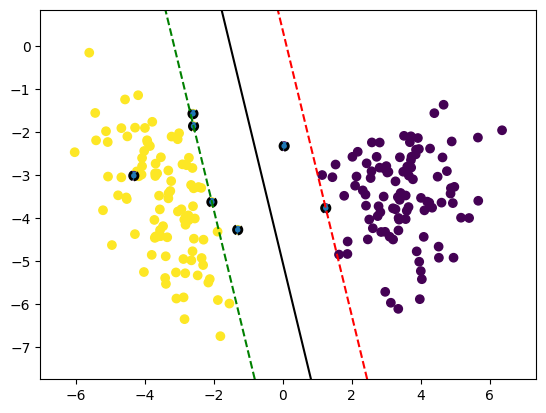

In [7]:
# plot the svm boundary along with the margins

plot_svm(X,y,svc)
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],edgecolors='k',linewidths=2,linestyles='dashed')
plt.show()

In [8]:
# check the support vectors index

print('The index values of support vectors is',svc.support_)

# check the support vectors dual variables
svc.dual_coef_[0]

The index values of support vectors is [ 26  28  62 135 152 155 176]


array([-1.        , -1.        , -0.27166361,  0.11163318,  1.        ,
        0.16003043,  1.        ])

In [9]:
# function that plot svm and also marks the postive and negative support vectors

def plot_svm(X,y,clf):
    arr_x = np.arange(X[:,0].min()-1,X[:,0].max()+1,0.01)
    arr_y = np.arange(X[:,1].min()-1,X[:,1].max()+1,0.01)

    # create the meshgrid
    XX,YY = np.meshgrid(arr_x,arr_y)

    arr_z = np.array([XX.ravel(),YY.ravel()]).T

    # predict the array
    z_final = clf.decision_function(arr_z).reshape(XX.shape)

    # plot on the graph
    plt.scatter(X[:,0],X[:,1],c=y)

    # make the decion boundary
    plt.contour(XX,YY,z_final,levels=[-1,0,1],colors=['red','k','green'],linestyles=['dashed','solid','dashed'])

    # plot the support vectors:
    pos_vectors = np.array([])
    neg_vectors = np.array([])

    for ind in range(clf.dual_coef_.size):
        if clf.dual_coef_[0][ind] > 0:
            val = clf.support_vectors_[ind]
            pos_vectors = np.concatenate((pos_vectors,val))
        else:
            val = clf.support_vectors_[ind]
            neg_vectors = np.concatenate((neg_vectors,val))

    pos_vectors = pos_vectors.reshape(-1,2)
    neg_vectors = neg_vectors.reshape(-1,2)

    # plot the positive support vectors
    plt.scatter(pos_vectors[:,0],pos_vectors[:,1],edgecolors='k',linewidths=2,s=50)

    # plot the negative support vectors
    plt.scatter(neg_vectors[:,0],neg_vectors[:,1],edgecolors='k',linewidths=2,s=50)


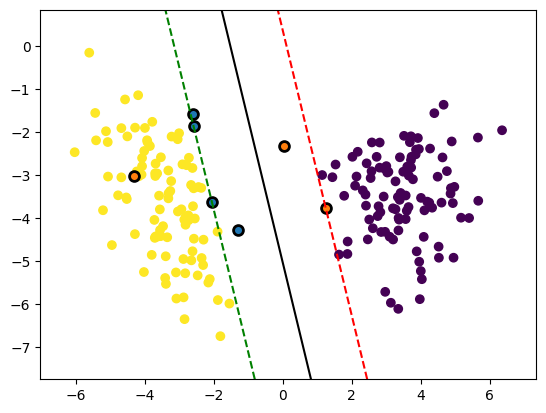

In [10]:
plot_svm(X,y,svc)

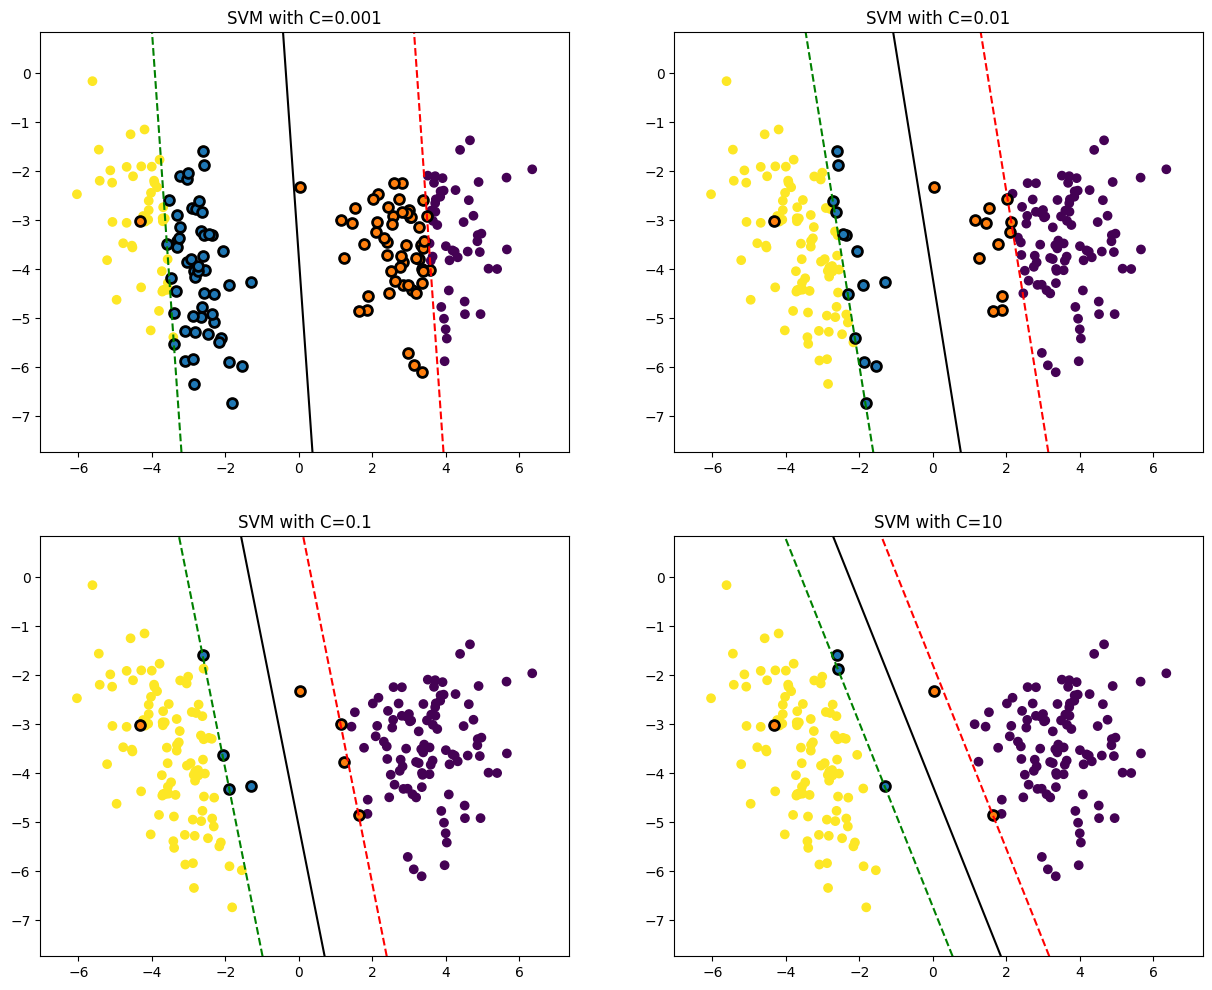

In [12]:
# plot the graph for two values of c

# different values of C hyperparameter
C = [0.001,0.01,0.1,10]

fig= plt.figure(figsize=(15,12))

for i in range(4):

    # plot the first plot
    plt.subplot(2,2,i+1)

    svc = SVC(kernel='linear',C=C[i])

    # fit the model
    svc.fit(X,y)

    # plot the graphs
    plot_svm(X,y,svc)
    plt.title(f'SVM with C={C[i]}')
